In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
import plotly.figure_factory as ff
import numpy as np
import math
import chart_studio.plotly as py
import plotly.express as px
from textwrap import wrap
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
import xgboost as xgb
from xgboost import cv
from sklearn.model_selection import cross_val_score, KFold
from math import sqrt

from sklearn.metrics import r2_score



In [4]:
train = pd.read_csv(r'C:\Users\Barre\Documents\GitHub\STOR565Project\GH.train.csv')
test = pd.read_csv(r'C:\Users\Barre\Documents\GitHub\STOR565Project\GH.test.csv')
tr = train.copy()
te = test.copy()
# tr = train[train['urban'] == 0].copy()
# te = test[test['urban'] == 0].copy()
tr = tr.filter(regex='^(?!.*[.][UL]$).')
te = te.filter(regex='^(?!.*[.][UL]$).')
tr.head(5)


,fips,Year,Population,Sq Miles,Count.B,Count.B.Sales,Count.B.Emp,PopDen.B,PopDen.B.Sales,PopDen.B.Emp,LandDen.B,LandDen.B.Sales,LandDen.B.Emp,Count.S,Count.S.Sales,Count.S.Emp,PopDen.S,PopDen.S.Sales,PopDen.S.Emp,LandDen.S,LandDen.S.Sales,LandDen.S.Emp,Count.W,Count.W.Sales,Count.w.Emp,PopDen.W,PopDen.W.Sales,PopDen.W.Emp,LandDen.W,LandDen.W.Sales,LandDen.W.Emp,location_name,Overall.Mortality.Rate,Diab.Kid.Rate,Digestive.Rate,Nutritional.Rate,SelfHarmnt.Interpersonal.Rate,Substance.Rate,Neurological.Rate,Maternal.Neonatal.Rate,Food Desert,urban,logarithm_pop,logarithm_miles
0,13001,2009,18193.000,507.08110,10,10,9,0.549662,0.549662,0.494696,0.019721,0.019721,0.017749,5,5,4,0.274831,0.274831,0.219865,0.009860,0.009860,0.007888,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Appling County (Georgia),0.010363,0.000691,0.000461,0.000019,0.000216,0.000149,0.000610,0.000070,8.244929,0,9.808792,6.228671
1,13001,2013,18471.000,507.08110,6,6,6,0.324834,0.324834,0.324834,0.011832,0.011832,0.011832,6,6,5,0.324834,0.324834,0.270695,0.011832,0.011832,0.009860,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Appling County (Georgia),0.010554,0.000748,0.000479,0.000020,0.000213,0.000148,0.000651,0.000061,6.496670,0,9.823957,6.228671
2,13003,2009,8280.409,339.38166,4,4,4,0.483068,0.483068,0.483068,0.011786,0.011786,0.011786,2,2,1,0.241534,0.241534,0.120767,0.005893,0.005893,0.002947,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Atkinson County (Georgia),0.008583,0.000604,0.000353,0.000016,0.000209,0.000137,0.000364,0.000107,7.246019,0,9.021648,5.827125
3,13003,2013,8313.000,339.38166,4,4,4,0.481174,0.481174,0.481174,0.011786,0.011786,0.011786,1,1,1,0.120294,0.120294,0.120294,0.002947,0.002947,0.002947,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Atkinson County (Georgia),0.008998,0.000666,0.000376,0.000016,0.000215,0.000157,0.000416,0.000076,6.014676,0,9.025576,5.827125
4,13003,2017,8313.000,339.38166,1,1,1,0.120294,0.120294,0.120294,0.002947,0.002947,0.002947,1,1,1,0.120294,0.120294,0.120294,0.002947,0.002947,0.002947,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Atkinson County (Georgia),0.010240,0.000789,0.000428,0.000035,0.000251,0.000220,0.000519,0.000077,2.405870,0,9.025576,5.827125


Overall.Mortality.Rate with only grocery data


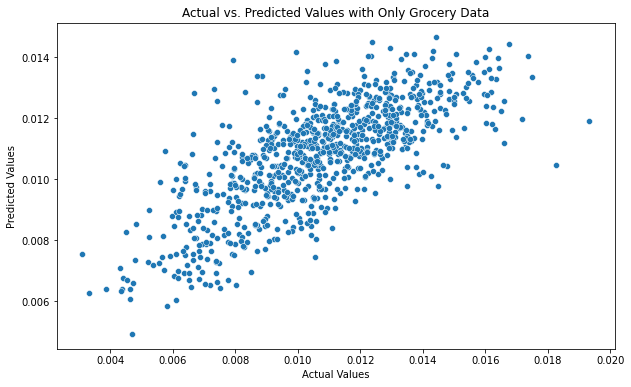

Overall.Mortality.Rate feature importance


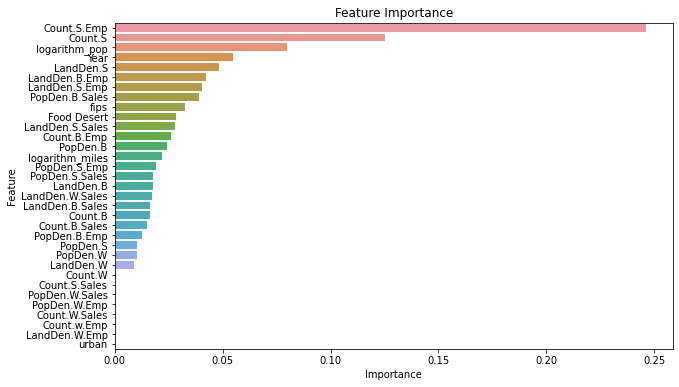

RMSE for training data (Overall.Mortality.Rate): 0.0016586184256326218
RMSE for test data (Overall.Mortality.Rate): 0.0017820681781458875


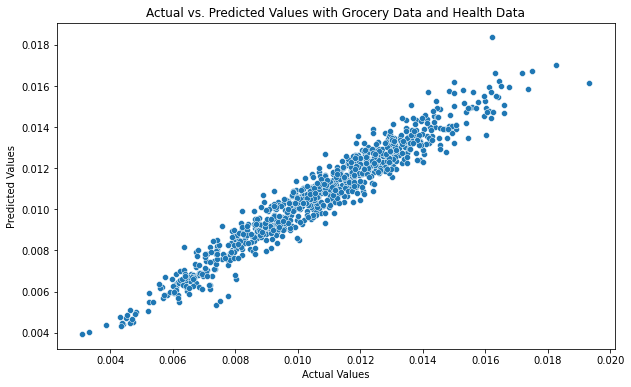

RMSE for training data (Overall.Mortality.Rate): 0.0005580084748250333
RMSE for test data (Overall.Mortality.Rate): 0.0006565788296996946
Diab.Kid.Rate with only grocery data


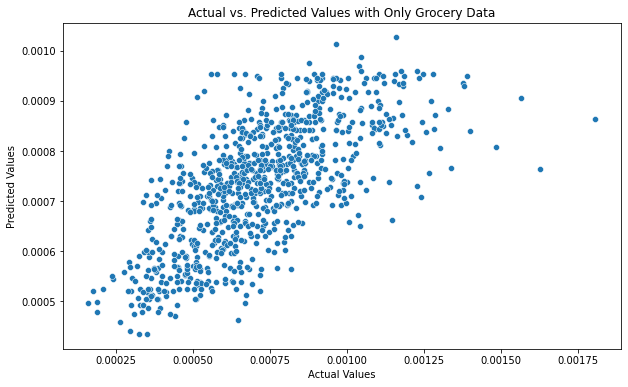

Diab.Kid.Rate feature importance


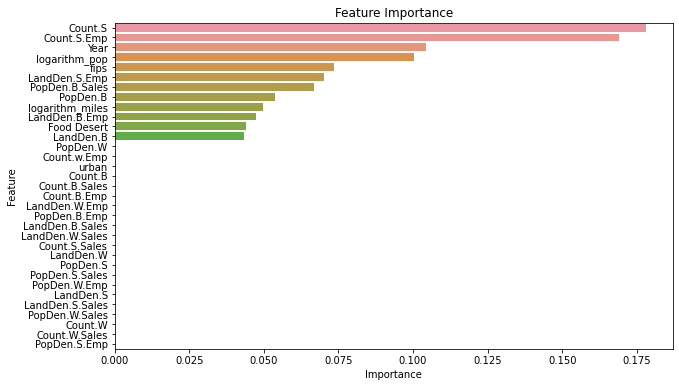

RMSE for training data (Diab.Kid.Rate): 0.00017441213740254324
RMSE for test data (Diab.Kid.Rate): 0.00017446572167833456


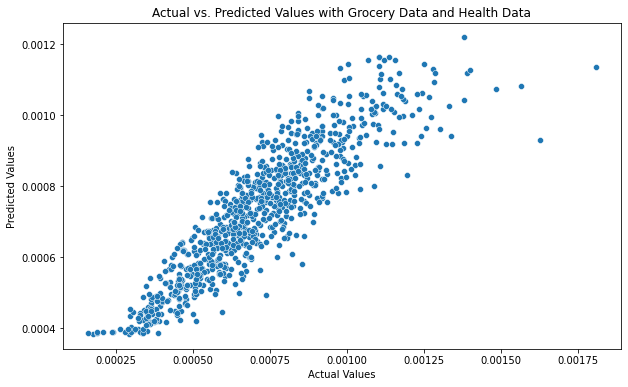

RMSE for training data (Diab.Kid.Rate): 0.0001069003668808463
RMSE for test data (Diab.Kid.Rate): 0.0001078419583903655
Digestive.Rate with only grocery data


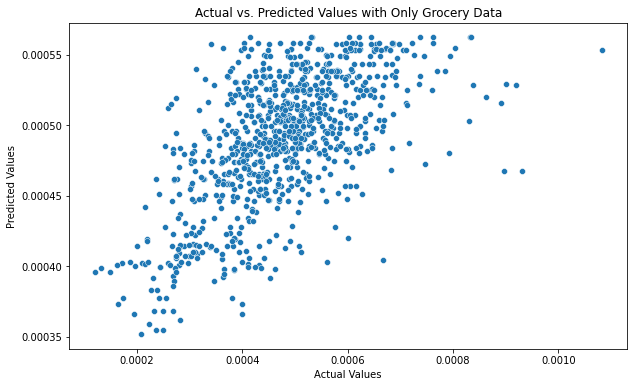

Digestive.Rate feature importance


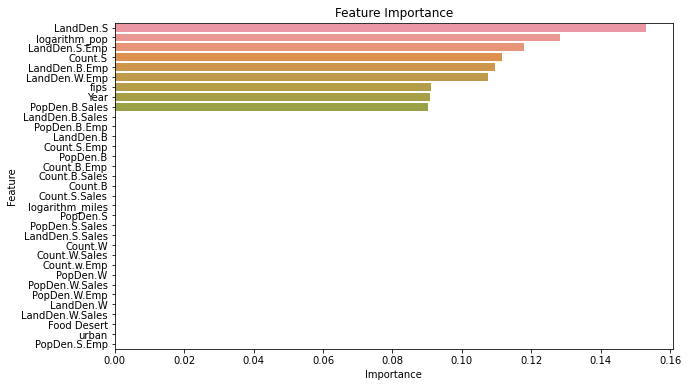

RMSE for training data (Digestive.Rate): 0.000104154914854498
RMSE for test data (Digestive.Rate): 0.00010700551644313282


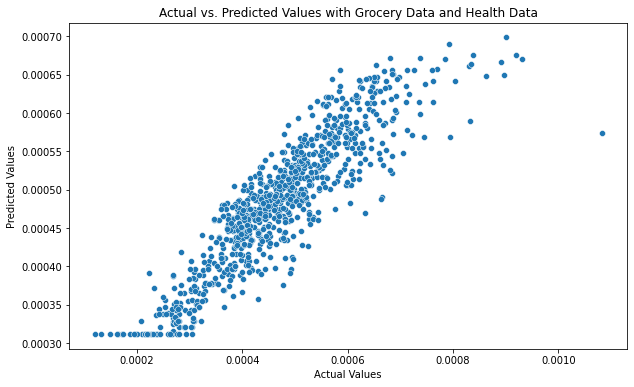

RMSE for training data (Digestive.Rate): 6.155859058933256e-05
RMSE for test data (Digestive.Rate): 6.515719544853115e-05
Nutritional.Rate with only grocery data


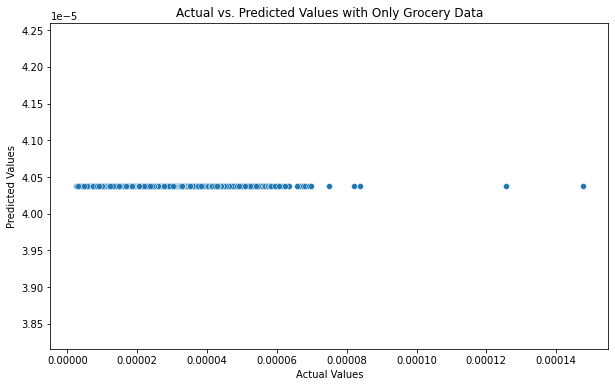

Nutritional.Rate feature importance


c:\Users\Barre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:546: RuntimeWarning: divide by zero encountered in divide
  return all_features / all_features.sum()
c:\Users\Barre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:546: RuntimeWarning: invalid value encountered in divide
  return all_features / all_features.sum()


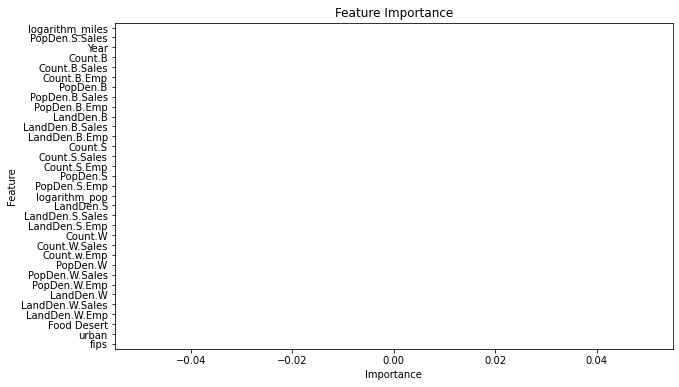

RMSE for training data (Nutritional.Rate): 2.021422345576811e-05
RMSE for test data (Nutritional.Rate): 2.0034555945175446e-05


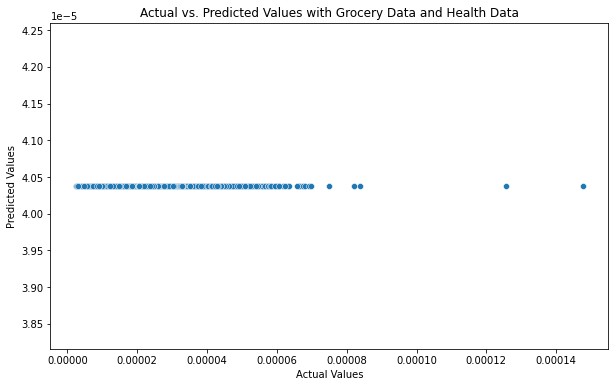

RMSE for training data (Nutritional.Rate): 2.021422345576811e-05
RMSE for test data (Nutritional.Rate): 2.0034555945175446e-05
SelfHarmnt.Interpersonal.Rate with only grocery data


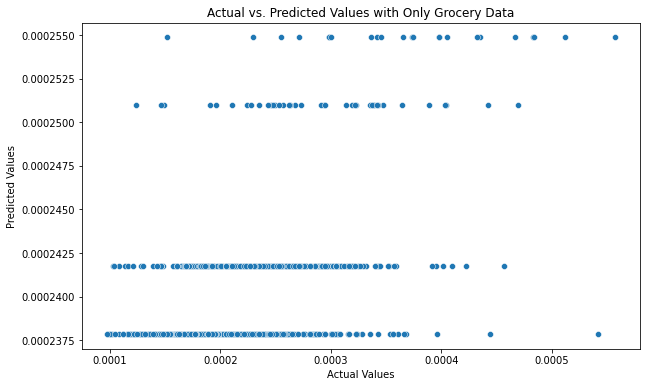

SelfHarmnt.Interpersonal.Rate feature importance


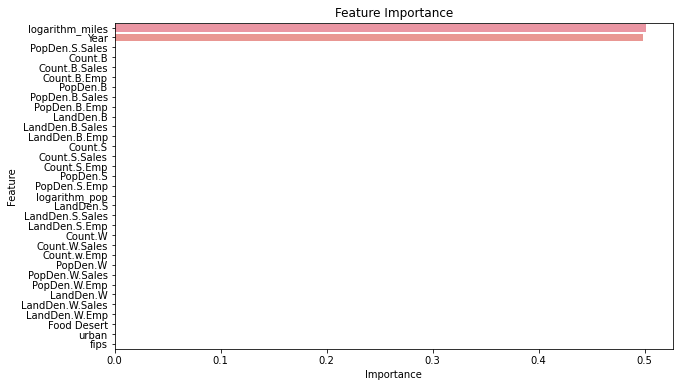

RMSE for training data (SelfHarmnt.Interpersonal.Rate): 6.117876245064115e-05
RMSE for test data (SelfHarmnt.Interpersonal.Rate): 6.501305321173256e-05


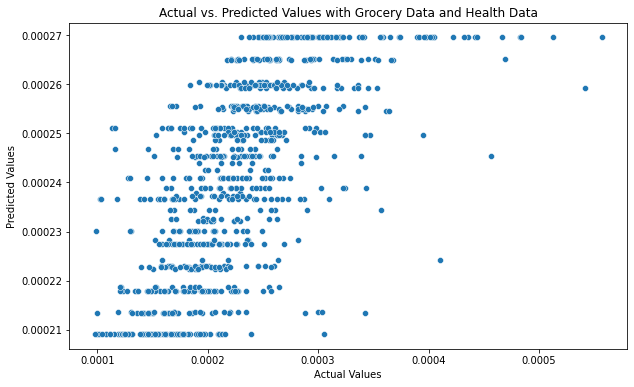

RMSE for training data (SelfHarmnt.Interpersonal.Rate): 5.164746686168597e-05
RMSE for test data (SelfHarmnt.Interpersonal.Rate): 5.594094725342121e-05
Substance.Rate with only grocery data


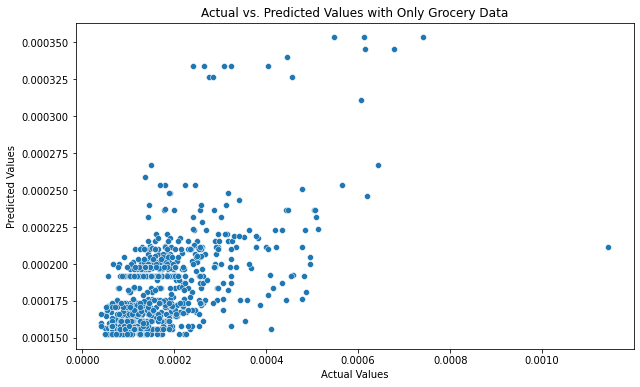

Substance.Rate feature importance


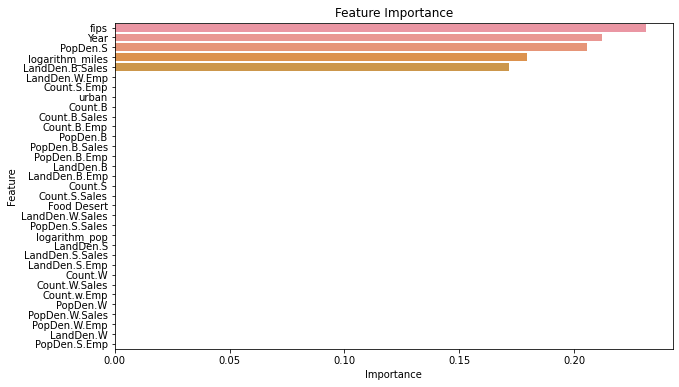

RMSE for training data (Substance.Rate): 8.996250302087001e-05
RMSE for test data (Substance.Rate): 8.924029682413823e-05


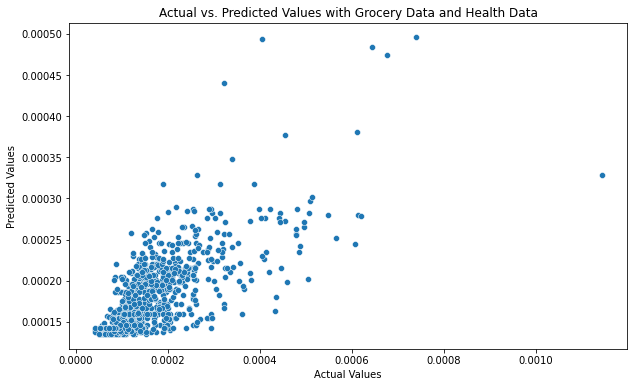

RMSE for training data (Substance.Rate): 7.679086759231134e-05
RMSE for test data (Substance.Rate): 7.810605126355014e-05
Neurological.Rate with only grocery data


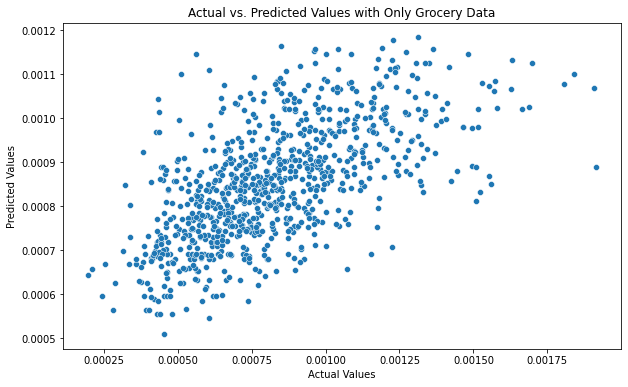

Neurological.Rate feature importance


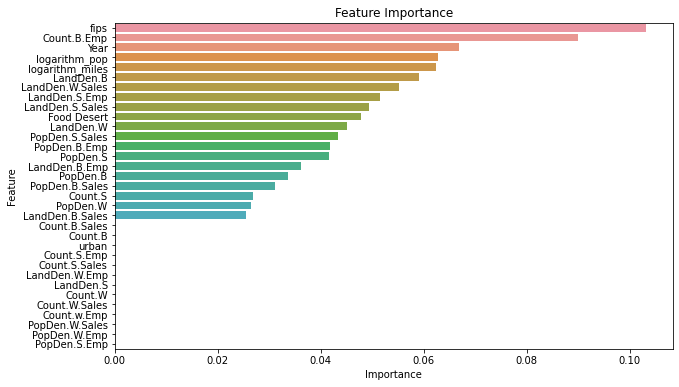

RMSE for training data (Neurological.Rate): 0.00022665872464366346
RMSE for test data (Neurological.Rate): 0.00022564728368550813


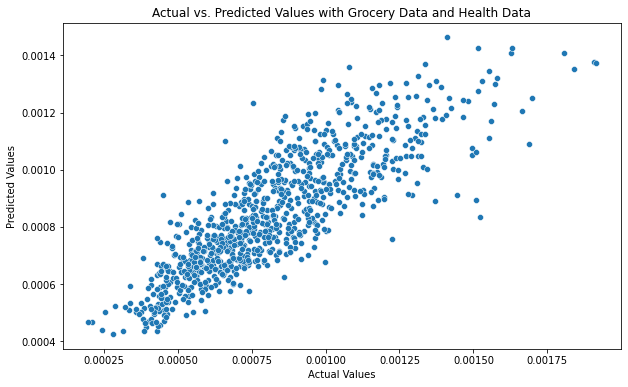

RMSE for training data (Neurological.Rate): 0.00015319580374101318
RMSE for test data (Neurological.Rate): 0.00015668469592928564
Maternal.Neonatal.Rate with only grocery data


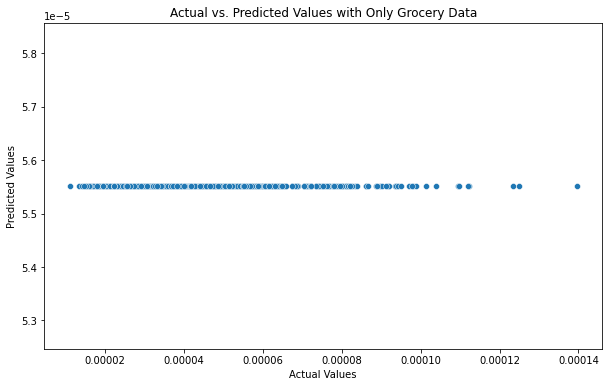

Maternal.Neonatal.Rate feature importance


c:\Users\Barre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:546: RuntimeWarning: divide by zero encountered in divide
  return all_features / all_features.sum()
c:\Users\Barre\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:546: RuntimeWarning: invalid value encountered in divide
  return all_features / all_features.sum()


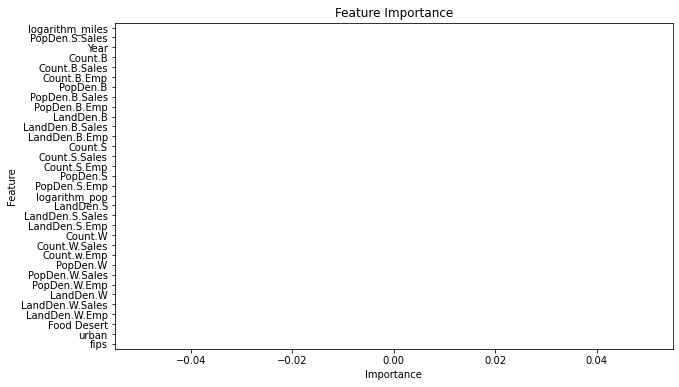

RMSE for training data (Maternal.Neonatal.Rate): 2.1623748013946776e-05
RMSE for test data (Maternal.Neonatal.Rate): 2.210473378508706e-05


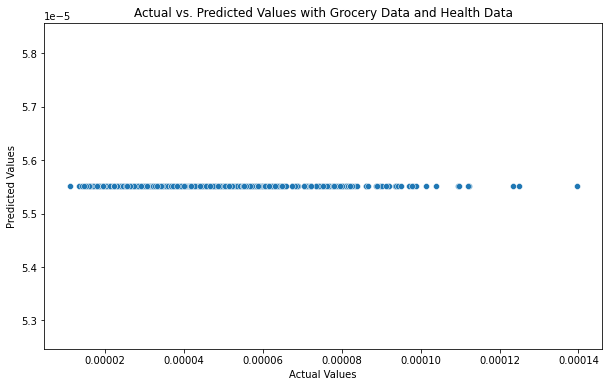

RMSE for training data (Maternal.Neonatal.Rate): 2.1623748013946776e-05
RMSE for test data (Maternal.Neonatal.Rate): 2.210473378508706e-05


In [6]:
y_cols = ['Overall.Mortality.Rate','Diab.Kid.Rate','Digestive.Rate','Nutritional.Rate','SelfHarmnt.Interpersonal.Rate','Substance.Rate','Neurological.Rate','Maternal.Neonatal.Rate']

def makexgb(y_cols, te, tr):
    i = 0
    while i <= len(y_cols) - 1:
        # Code for grocery data only
        test1 = te.copy()
        train1 = tr.copy()
        print(f"{y_cols[i]} with only grocery data")
        X_og = train1.drop(['Overall.Mortality.Rate', 'Population', 'Sq Miles', 'location_name', 'Diab.Kid.Rate', 'Digestive.Rate', 'Nutritional.Rate', 'SelfHarmnt.Interpersonal.Rate', 'Substance.Rate', 'Neurological.Rate', 'Maternal.Neonatal.Rate'], axis=1)
        X_og_test = test1.drop(['Overall.Mortality.Rate', 'Population', 'Sq Miles', 'location_name', 'Diab.Kid.Rate', 'Digestive.Rate', 'Nutritional.Rate', 'SelfHarmnt.Interpersonal.Rate', 'Substance.Rate', 'Neurological.Rate', 'Maternal.Neonatal.Rate'], axis=1)

        y_og = train1[y_cols[i]]
        y_og_test = test1[y_cols[i]]
        xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
        xg_reg.fit(X_og, y_og)
        
        y_pred = xg_reg.predict(X_og_test)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_og_test, y=y_pred)

        plt.title('Actual vs. Predicted Values with Only Grocery Data')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()
        print(f"{y_cols[i]} feature importance")
        feature_importances = xg_reg.feature_importances_

        sorted = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importances[sorted], y=X_og.columns[sorted])
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
        # tr rmse
        rmse_train = sqrt(mean_squared_error(y_og, xg_reg.predict(X_og)))
        print(f"RMSE for training data ({y_cols[i]}): {rmse_train}")

        # test rmse
        rmse_test = sqrt(mean_squared_error(y_og_test, y_pred))
        print(f"RMSE for test data ({y_cols[i]}): {rmse_test}")

        # grocery and test preds
        test2 = te.copy()
        train2 = tr.copy()
        X_og = train2.drop([y_cols[i], 'Population', 'Sq Miles', 'location_name'], axis=1)
        X_og_test = test2.drop([y_cols[i], 'Population', 'Sq Miles', 'location_name'], axis=1)
        y_og = train2[y_cols[i]]
        y_og_test = test2[y_cols[i]]
        xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)
        xg_reg.fit(X_og, y_og)
        
        y_pred = xg_reg.predict(X_og_test)

        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=y_og_test, y=y_pred)

        plt.title('Actual vs. Predicted Values with Grocery Data and Health Data')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

        # Calculate RMSE for training data
        rmse_train = sqrt(mean_squared_error(y_og, xg_reg.predict(X_og)))
        print(f"RMSE for training data ({y_cols[i]}): {rmse_train}")

        # Calculate RMSE for test data
        rmse_test = sqrt(mean_squared_error(y_og_test, y_pred))
        print(f"RMSE for test data ({y_cols[i]}): {rmse_test}")

        i += 1

makexgb(y_cols=y_cols, te=te, tr=tr)



In [ ]:
3.175766991560203e-06
.0000006